# Sharks Attack Dataset Cleaning 🦈🧹

In this notebook, we will be cleaning the `shark_attacks.csv` dataset, leaving a suitable dataset for exploratory data analysis.
However, we have been restricted for this specific task, our lead teacher has proposed the following restrictions:

- There must be the same number of columns as there are in the raw CSV, so in our final cleaned version we need to have a total of `23` columns.
- There must remain at least `2500` rows after our cleaning.
- So our `df.shape = (2500, 23)`

In [1]:
# Import the neccesary libraries for our cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Step 1: Load the CSV into a Dataframe 📥

In [2]:
# Let's first address some issues, let's display ALL columns
pd.set_option('display.max_columns', 50)

In [3]:
sharks_raw = pd.read_csv('data/shark_attacks.csv', encoding="latin-1")
pd.set_option('display.max_rows', 50)
sharks_raw

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Let's save the shape of our original dataframe to make sure we comply with restrictions
original_shape = sharks_raw.shape
original_shape

(25723, 24)

In [5]:
# We now will work with our copy of the original dataframe and start cleaning
sharks = sharks_raw.copy()

## Step 2: Check for duplicated rows 👥
As a first step, we will check for duplicated rows, as 2x rows exactly the same won't be useful for our analysis

In [6]:
sharks.duplicated().value_counts()

True     19411
False     6312
Name: count, dtype: int64

In [7]:
# We have over 19,000 duplicated rows, let's drop them
sharks.drop_duplicates(inplace=True)
sharks.duplicated().value_counts()

False    6312
Name: count, dtype: int64

## Step 3: Null cleaning 🫙
#### Now that we have no duplicated rows, we will check how many null values we have in our dataframe
#### I believe visualizing the nulls with a heatmap can be very useful to understand the big picture of nulls present in any dataframe

In [8]:
# My function to plot nulls

def plot_null_heatmap(df):
    # Create a heatmap of null values in the DataFrame
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Null Values Heatmap")
    plt.show()

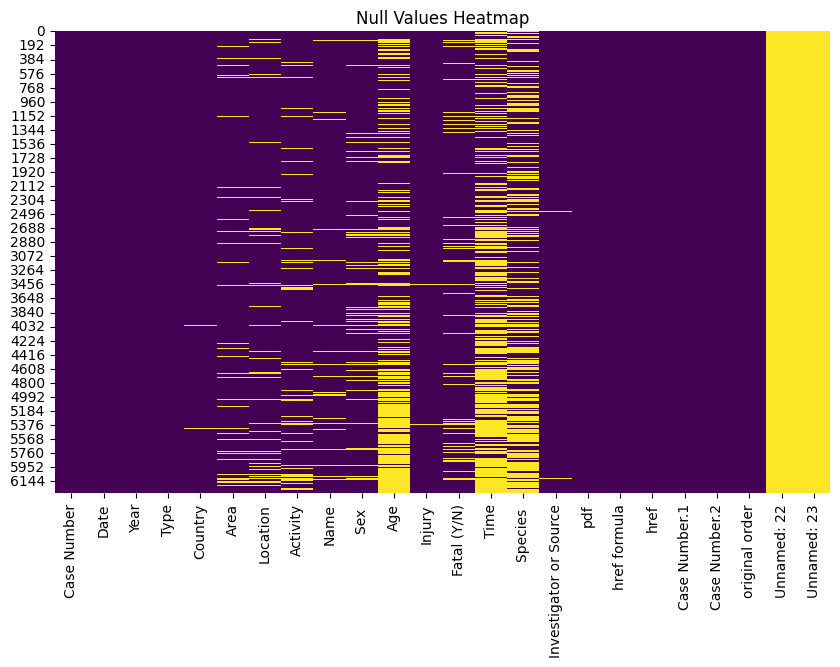

In [9]:
plot_null_heatmap(sharks)

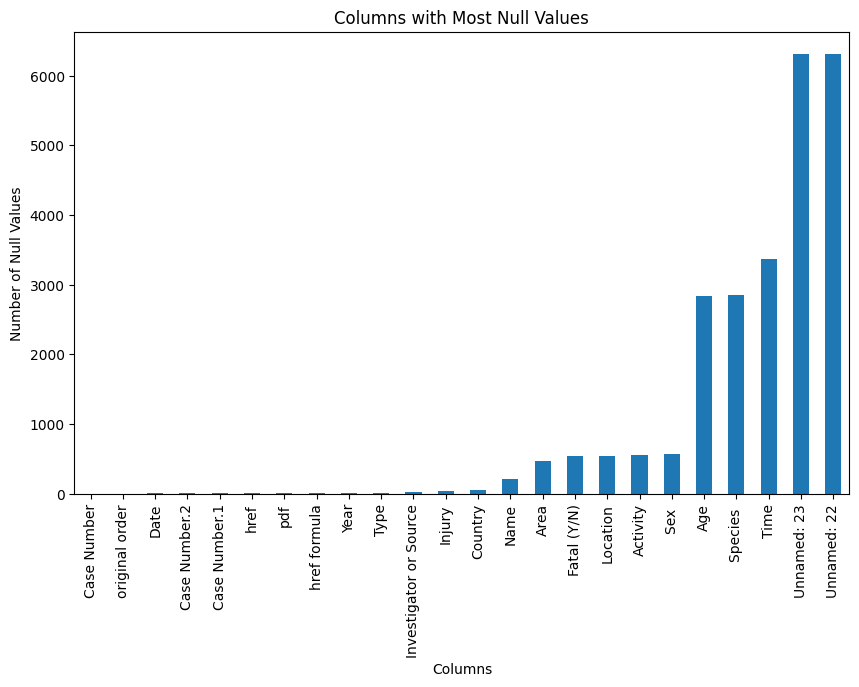

In [10]:
# Calculate the number of null values in each column
null_counts = sharks.isnull().sum()

# Sort the columns by the number of null values (ascending)
null_counts = null_counts.sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Columns with Most Null Values')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()


#### 2 columns instantly stand out, let's move on!

In [11]:
sharks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 6312 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6310 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   obje

#### Let's find out the columns with null values!

In [12]:
# columnas con valores nulos

nan_cols = sharks.isna().sum()

nan_cols[nan_cols>0]

nan_cols.sort_values(ascending=False)

Unnamed: 22               6311
Unnamed: 23               6310
Time                      3364
Species                   2848
Age                       2841
Sex                        575
Activity                   554
Location                   550
Fatal (Y/N)                549
Area                       465
Name                       220
Country                     60
Injury                      38
Investigator or Source      27
Type                        14
Year                        12
href formula                11
Date                        10
pdf                         10
href                        10
Case Number.1               10
Case Number.2               10
original order               3
Case Number                  2
dtype: int64

#### Wow 😲, there is a huge amount of nulls in the `Unnamed: 22` and `Unnamed: 23`
- Let's first address these 2 columns, we know we have `6312` rows after removing duplicated rows, so they are practically empty.
- According to the restrictions, we need to have 23 cols at the end of our analysis, so lets drop both `Unnamed: 22` and `Unnamed: 23` and later fix it!

In [13]:
sharks.drop(columns=['Unnamed: 22', 'Unnamed: 23'], axis=1, inplace=True)

In [14]:
sharks.isna().sum().sort_values(ascending=False).head(10)

Time           3364
Species        2848
Age            2841
Sex             575
Activity        554
Location        550
Fatal (Y/N)     549
Area            465
Name            220
Country          60
dtype: int64

The next column with a significant amount of `null` values is Time with `3364`

In [15]:
sharks[sharks["Time"].notnull()].Time.value_counts()

Time
Afternoon      187
11h00          128
Morning        121
12h00          109
15h00          108
              ... 
14h37            1
10h07            1
13h53            1
13h23            1
19h00-20h00      1
Name: count, Length: 366, dtype: int64

As it name implies, simply the time at which the attack took place, let`s find the proportion of nulls of the column

In [16]:
sharks.shape

(6312, 22)

In [17]:
sharks.Time.isna().value_counts(normalize=True)

Time
True     0.532953
False    0.467047
Name: proportion, dtype: float64

#### `46.7%` of the `Time` column are null values, and we can no longer remove columns, so let's address it this way:
- We can remove rows. We have a total of `6312` rows, and we are limited to a minimum of  `2,500`
- Let's remove the NaN first, and then try to standarize the `Time` column with more uniform values

In [18]:
sharks['Time'].fillna('unknown', inplace=True)
shape = sharks.shape

#### As for the rest of the values in this columns, let's try to standarize it into three categories: `morning`, `afternoon`, `evening` and `night`

In [19]:
def standardize_time(df):
    # Define a regular expression pattern to match time values like "10h30"
    time_pattern = r'(\d{1,2})[h:](\d{2})'

    def categorize_time(time_str):

        if "noon" in time_str.lower() or "lunch" in time_str.lower() or "afternon" in time_str.lower() or "1500" in time_str.lower():
            return "afternoon"       
        if "morning" in time_str.lower() or "midday" in time_str.lower() or "dawn" in time_str.lower() or "daybreak" in time_str.lower() or "1300" in time_str.lower() or "0830" in time_str.lower():
            return "morning"
        if "night" in time_str.lower() or "dark" in time_str.lower() or "0500" in time_str.lower():
            return "night"
        if "dusk" in time_str.lower() or "sunset" in time_str.lower() or "evening" in time_str.lower() or "sundown" in time_str.lower():
            return "evening"
        
        else:
            pass


        # Extract hour and minute using the regular expression pattern
        match = re.search(time_pattern, time_str)
        if match:
            hour = int(match.group(1))
            minute = int(match.group(2))

            if 0 <= hour < 6:
                return 'night'
            elif 6 <= hour < 12:
                return 'morning'
            elif 12 <= hour < 18:
                return 'afternoon'
            else:
                return 'evening'
        else:
            # If the string does not match the pattern, return it as is
            return "unknown"

    # Apply the categorize_time function to the "Time" column
    df['Time'] = df['Time'].apply(categorize_time)

    return df



In [20]:
standardize_time(sharks)
sharks.Time.value_counts()

Time
unknown      3410
afternoon    1558
morning       933
evening       294
night         117
Name: count, dtype: int64

#### Let's check out the next null column we can fix.

Text(0, 0.5, 'Number of Null Values')

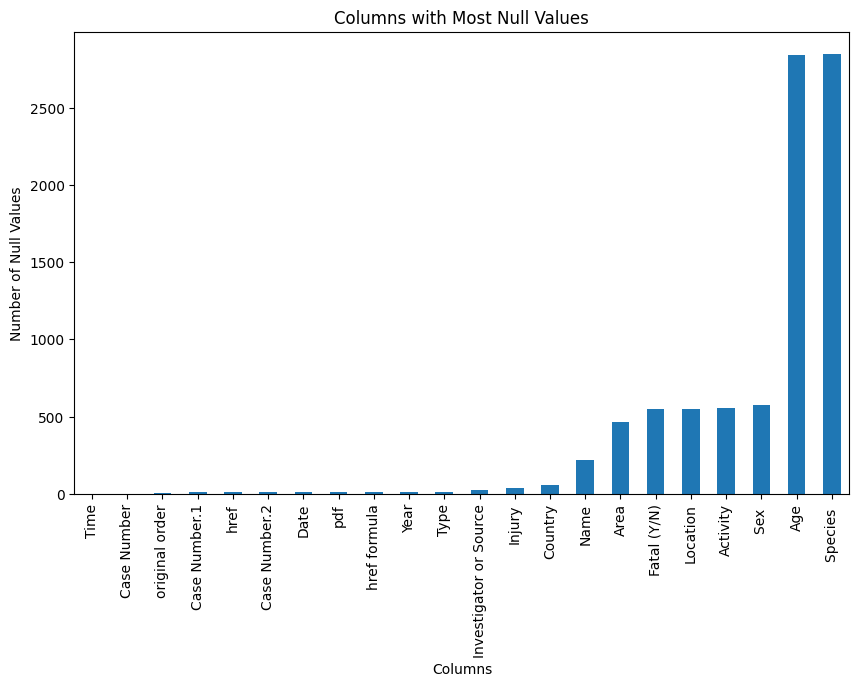

In [21]:
# Calculate the number of null values in each column
null_counts = sharks.isnull().sum()

# Sort the columns by the number of null values (ascending)
null_counts = null_counts.sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Columns with Most Null Values')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')


In [22]:
sharks = sharks.rename(columns=lambda x: x.replace(" ","")) # Quickly removing any spaces on columns
sharks.Species.head(15)

0               White shark
1                       NaN
2                       NaN
3                 2 m shark
4           Tiger shark, 3m
5                       NaN
6               Tiger shark
7           Lemon shark, 3'
8            Bull shark, 6'
9                       NaN
10          Grey reef shark
11                      NaN
12                      NaN
13         Invalid incident
14    Tawny nurse shark, 2m
Name: Species, dtype: object

#### Truly bad column without any sort of norm, we will fill nulls with unknown for now and send an email to the Data Engineer

In [23]:
sharks.Species.fillna('unknown', inplace=True)
sharks["Species"].isnull().value_counts()

Species
False    6312
Name: count, dtype: int64

In [24]:
sharks.isnull().sum().sort_values(ascending=False)

Age                     2841
Sex                      575
Activity                 554
Location                 550
Fatal(Y/N)               549
Area                     465
Name                     220
Country                   60
Injury                    38
InvestigatororSource      27
Type                      14
Year                      12
hrefformula               11
href                      10
Date                      10
CaseNumber.2              10
CaseNumber.1              10
pdf                       10
originalorder              3
CaseNumber                 2
Species                    0
Time                       0
dtype: int64

### We have several null columns left, where we are left without much clue on how to fill the missing values, so let's fill them with unknowns

In [25]:
sharks.fillna('unknown', inplace=True)

/var/folders/f2/ty6sgcw911g2_3vqhhq561vm0000gn/T/ipykernel_50802/2168755920.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sharks.fillna('unknown', inplace=True)


In [26]:
sharks.isnull().sum().any()

False

In [27]:
sharks.shape

(6312, 22)

#### No more null values in our Dataframe. We had to fill several `NaN` values with `unknown` but we are on our way to cleaning all the dataset. Now we can start with Incorrect values.

## Step 4: Incorrect Values ❌
#### We can now proceed into the next step, addressing incorrect values to make our dataframe more reliable, clean and usable

#### Let's take a look into the columns from left to right, keeping in mind we still can remove `3812` rows

In [28]:
sharks.head()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,evening,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,afternoon,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,morning,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


#### Let's first address the `Year` column to check the value counts

In [29]:
sharks.Year

0         2018.0
1         2018.0
2         2018.0
3         2018.0
4         2018.0
          ...   
6307     unknown
6308     unknown
6309     unknown
8702     unknown
25722    unknown
Name: Year, Length: 6312, dtype: object

#### Let's remove rows that have more than 5 `unknown` values

In [30]:

# Count 'unknown' values in each row
count_unknown = (sharks == 'unknown').sum(axis=1)

# Filter rows with no more than 5 'unknown' values
sharks = sharks[count_unknown <= 5]

sharks.shape

(6167, 22)

`145` rows dropped, 5 or more unkowns are not worth

In [31]:
sharks.Year.unique()

array([2018.0, 2017.0, 'unknown', 2016.0, 2015.0, 2014.0, 2013.0, 2012.0,
       2011.0, 2010.0, 2009.0, 2008.0, 2007.0, 2006.0, 2005.0, 2004.0,
       2003.0, 2002.0, 2001.0, 2000.0, 1999.0, 1998.0, 1997.0, 1996.0,
       1995.0, 1984.0, 1994.0, 1993.0, 1992.0, 1991.0, 1990.0, 1989.0,
       1969.0, 1988.0, 1987.0, 1986.0, 1985.0, 1983.0, 1982.0, 1981.0,
       1980.0, 1979.0, 1978.0, 1977.0, 1976.0, 1975.0, 1974.0, 1973.0,
       1972.0, 1971.0, 1970.0, 1968.0, 1967.0, 1966.0, 1965.0, 1964.0,
       1963.0, 1962.0, 1961.0, 1960.0, 1959.0, 1958.0, 1957.0, 1956.0,
       1955.0, 1954.0, 1953.0, 1952.0, 1951.0, 1950.0, 1949.0, 1948.0,
       1848.0, 1947.0, 1946.0, 1945.0, 1944.0, 1943.0, 1942.0, 1941.0,
       1940.0, 1939.0, 1938.0, 1937.0, 1936.0, 1935.0, 1934.0, 1933.0,
       1932.0, 1931.0, 1930.0, 1929.0, 1928.0, 1927.0, 1926.0, 1925.0,
       1924.0, 1923.0, 1922.0, 1921.0, 1920.0, 1919.0, 1918.0, 1917.0,
       1916.0, 1915.0, 1914.0, 1913.0, 1912.0, 1911.0, 1910.0, 1909.0,
   

In [32]:
for value in sharks['Year']:
    if isinstance(value, str):
        print(value)


unknown
unknown


In [33]:
# Use boolean indexing to select rows that don't have 'unknown' in the 'Year' column
sharks = sharks[sharks['Year'] != 'unknown']

In [34]:
sharks.Year.astype(int)

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
6297       0
6298       0
6299       0
6300       0
6301       0
Name: Year, Length: 6165, dtype: int64

In [35]:
len(sharks[sharks['Year'] < 1700])

128

#### We will remove the `128` rows with attacks in years earlier than `1700`

In [36]:
sharks = sharks[sharks['Year'] > 1700]
sharks.shape

(6034, 22)

#### `Year` column solved, let's move on to the next, let's address the `Type`

In [46]:
sharks.Type.head()

0          Boat
1    Unprovoked
2       Invalid
3    Unprovoked
4      Provoked
Name: Type, dtype: object

#### Let's check the number of `unknown` values in `Type column`

In [38]:
len(sharks[sharks['Type']=='unknown'])

3

In [39]:
sharks = sharks[sharks['Type'] != 'unknown']

In [40]:
sharks.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'Boat', 'Boatomg'], dtype=object)

In [41]:
sharks['Type'] = sharks['Type'].str.replace('.*Boat.*', 'Boat', regex=True)
sharks.Type.value_counts()

Type
Unprovoked      4419
Provoked         564
Invalid          504
Boat             330
Sea Disaster     212
Questionable       2
Name: count, dtype: int64

Seeing there is only 2 `Questionable` let's just drop them

In [49]:
sharks = sharks[sharks.Type != 'Questionable']
sharks.Type.value_counts()

Type
Unprovoked      4419
Provoked         564
Invalid          504
Boat             330
Sea Disaster     212
Name: count, dtype: int64

#### Let's now check out the Country column

In [47]:
sharks.Country.

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder
0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,evening,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,afternoon,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,morning,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,1748.00.00,1748,1748.0,Unprovoked,PANAMA,Las Perlas archipelago,Taboga & Isla del Rey,Pearl diving,African slaves,M,unknown,FATAL,Y,unknown,unknown,"J. Castro, et al",1748.00.00.R-LasPerlas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1748.00.00,1748.00.00,149.0
6155,1742.12.17,17-Dec-1742,1742.0,Unprovoked,unknown,unknown,Carlisle Bay,Swimming,2 impressed seamen,M,unknown,FATAL,Y,unknown,unknown,"C. Moore, GSAF",1742.12.17-AdviceSeamen.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1742.12.17,1742.12.17,148.0
6156,1738.04.06.R,Reported 06-Apr-1738,1738.0,Unprovoked,ITALY,Sicily,Strait of Messina,Swimming,male,M,unknown,FATAL,Y,unknown,unknown,"C. Moore, GSAF",1738.04.06.R-Messina.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1738.04.06.R,1738.04.06.R,147.0
6159,1721.06.00,June 1721,1721.0,Unprovoked,ITALY,Sardinia,"Ponte della Maddelena,",Swimming,male,M,unknown,"FATAL, partial remains recovered from sharks...",Y,unknown,"White shark, 1600-lb female",F. Ricciardi; A. De Maddalena.,1721.06.00-Maddalena.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1721.06.00,1721.06.00,144.0
